In [1]:
import astropy.units as u
from sunpy.net import Fido, attrs as a
import glob
import sunpy.map
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import re

## Which time range is AIA data available ?
14:3?5 -- 20:30 没有AIA数据

而十字扫描是在 14:15--23:05

In [3]:
obs_start = "2011-01-27T20:00:00"
obs_end = "2011-01-27T21:00:00"
obs_time = a.Time(obs_start, obs_end)
unifresp = Fido.search(obs_time,a.Instrument.aia) # aia

In [4]:
unifresp

Start Time,End Time,Source,Instrument,Wavelength,Provider,Physobs,Wavetype,Extent Width,Extent Length,Extent Type,Size,Info
,,,,Angstrom,,,,,,,Mibyte,
Time,Time,str3,str3,float64[2],str4,str9,str6,str4,str4,str8,float64,str57
2011-01-27 20:30:36.000,2011-01-27 20:30:37.000,SDO,AIA,335.0 .. 335.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [6.899 exposure] [100.00 percentd]"
2011-01-27 20:30:43.000,2011-01-27 20:30:44.000,SDO,AIA,211.0 .. 211.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [4.998 exposure] [100.00 percentd]"
2011-01-27 20:30:43.000,2011-01-27 20:30:44.000,SDO,AIA,171.0 .. 171.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [2.999 exposure] [100.00 percentd]"
2011-01-27 20:30:46.000,2011-01-27 20:30:47.000,SDO,AIA,131.0 .. 131.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [6.899 exposure] [100.00 percentd]"
2011-01-27 20:30:46.000,2011-01-27 20:30:47.000,SDO,AIA,304.0 .. 304.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [4.999 exposure] [100.00 percentd]"
2011-01-27 20:30:53.000,2011-01-27 20:30:54.000,SDO,AIA,94.0 .. 94.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [6.899 exposure] [100.00 percentd]"
2011-01-27 20:30:53.000,2011-01-27 20:30:54.000,SDO,AIA,1600.0 .. 1600.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [3.000 exposure] [100.00 percentd]"
2011-01-27 20:30:56.000,2011-01-27 20:30:57.000,SDO,AIA,335.0 .. 335.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [6.899 exposure] [100.00 percentd]"


In [36]:
obs_start = "2011-01-27T14:15:00"
obs_end = "2011-01-27T23:05:00"
obs_time = a.Time(obs_start, obs_end)

unifresp1 = Fido.search(obs_time,a.Sample(10*u.min),a.Instrument.aia) # aia

In [37]:
unifresp1

Start Time,End Time,Source,Instrument,Wavelength,Provider,Physobs,Wavetype,Extent Width,Extent Length,Extent Type,Size,Info
,,,,Angstrom,,,,,,,Mibyte,
Time,Time,str3,str3,float64[2],str4,str9,str6,str4,str4,str8,float64,str57
2011-01-27 14:15:03.000,2011-01-27 14:15:04.000,SDO,AIA,171.0 .. 171.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [2.999 exposure] [100.00 percentd]"
2011-01-27 14:25:03.000,2011-01-27 14:25:04.000,SDO,AIA,171.0 .. 171.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [2.999 exposure] [100.00 percentd]"
2011-01-27 20:30:36.000,2011-01-27 20:30:37.000,SDO,AIA,335.0 .. 335.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [6.899 exposure] [100.00 percentd]"
2011-01-27 20:35:03.000,2011-01-27 20:35:04.000,SDO,AIA,171.0 .. 171.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [2.999 exposure] [100.00 percentd]"
2011-01-27 20:45:03.000,2011-01-27 20:45:04.000,SDO,AIA,171.0 .. 171.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [2.999 exposure] [100.00 percentd]"
2011-01-27 20:55:03.000,2011-01-27 20:55:04.000,SDO,AIA,171.0 .. 171.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [2.999 exposure] [100.00 percentd]"
2011-01-27 21:05:03.000,2011-01-27 21:05:04.000,SDO,AIA,171.0 .. 171.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [2.999 exposure] [100.00 percentd]"
2011-01-27 21:15:03.000,2011-01-27 21:15:04.000,SDO,AIA,171.0 .. 171.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [2.999 exposure] [100.00 percentd]"


In [6]:
obs_start = "2011-01-27T14:35:00"
obs_end = "2011-01-27T20:30:00"
obs_time = a.Time(obs_start, obs_end)
unifresp2 = Fido.search(obs_time,a.Instrument.aia) # aia
unifresp2

<sunpy.net.fido_factory.UnifiedResponse object at 0x000001B128EE94C0>
Results from 0 Providers:

<sunpy.net.fido_factory.UnifiedResponse object at 0x000001C8E2E74940>
Results from 0 Providers:

## Download multiple AIA data

In [13]:
obs_start = "2011-01-27T20:00:00"
obs_end = "2011-01-27T23:05:00"
obs_time = a.Time(obs_start, obs_end)
unifresp = Fido.search(obs_time,a.Instrument.aia,\
                       a.Wavelength(304*u.angstrom)) # aia

In [14]:
unifresp

Start Time,End Time,Source,Instrument,Wavelength,Provider,Physobs,Wavetype,Extent Width,Extent Length,Extent Type,Size,Info
,,,,Angstrom,,,,,,,Mibyte,
Time,Time,str3,str3,float64[2],str4,str9,str6,str4,str4,str8,float64,str57
2011-01-27 20:30:46.000,2011-01-27 20:30:47.000,SDO,AIA,304.0 .. 304.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [4.999 exposure] [100.00 percentd]"
2011-01-27 20:31:06.000,2011-01-27 20:31:07.000,SDO,AIA,304.0 .. 304.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [4.999 exposure] [100.00 percentd]"
2011-01-27 20:31:26.000,2011-01-27 20:31:27.000,SDO,AIA,304.0 .. 304.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [4.999 exposure] [100.00 percentd]"
2011-01-27 20:31:46.000,2011-01-27 20:31:47.000,SDO,AIA,304.0 .. 304.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [4.999 exposure] [100.00 percentd]"
2011-01-27 20:32:06.000,2011-01-27 20:32:07.000,SDO,AIA,304.0 .. 304.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [4.999 exposure] [100.00 percentd]"
2011-01-27 20:32:26.000,2011-01-27 20:32:27.000,SDO,AIA,304.0 .. 304.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [4.999 exposure] [100.00 percentd]"
2011-01-27 20:32:46.000,2011-01-27 20:32:47.000,SDO,AIA,304.0 .. 304.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [4.999 exposure] [100.00 percentd]"
2011-01-27 20:33:06.000,2011-01-27 20:33:07.000,SDO,AIA,304.0 .. 304.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [4.999 exposure] [100.00 percentd]"


In [15]:
files = Fido.fetch(unifresp, path='data/{instrument}')

Files Downloaded:   0%|          | 0/439 [00:00<?, ?file/s]

aia_lev1_304a_2011_01_27t20_30_46_21z_image_lev1.fits:   0%|          | 0.00/8.77M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_31_06_21z_image_lev1.fits:   0%|          | 0.00/8.77M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_32_06_21z_image_lev1.fits:   0%|          | 0.00/8.77M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_31_26_21z_image_lev1.fits:   0%|          | 0.00/8.77M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_32_26_21z_image_lev1.fits:   0%|          | 0.00/8.70M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_32_46_21z_image_lev1.fits:   0%|          | 0.00/9.00M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_33_06_21z_image_lev1.fits:   0%|          | 0.00/8.88M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_33_26_21z_image_lev1.fits:   0%|          | 0.00/9.01M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_33_46_21z_image_lev1.fits:   0%|          | 0.00/9.01M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_34_26_21z_image_lev1.fits:   0%|          | 0.00/9.01M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_34_46_21z_image_lev1.fits:   0%|          | 0.00/9.03M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_35_06_21z_image_lev1.fits:   0%|          | 0.00/8.84M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_35_26_21z_image_lev1.fits:   0%|          | 0.00/9.02M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_35_46_21z_image_lev1.fits:   0%|          | 0.00/9.29M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_38_26_21z_image_lev1.fits:   0%|          | 0.00/9.58M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_38_46_21z_image_lev1.fits:   0%|          | 0.00/9.58M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_39_06_21z_image_lev1.fits:   0%|          | 0.00/9.59M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_40_26_21z_image_lev1.fits:   0%|          | 0.00/9.53M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_40_46_21z_image_lev1.fits:   0%|          | 0.00/9.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_41_26_21z_image_lev1.fits:   0%|          | 0.00/9.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_41_46_21z_image_lev1.fits:   0%|          | 0.00/9.96M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_42_06_21z_image_lev1.fits:   0%|          | 0.00/9.96M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_42_26_21z_image_lev1.fits:   0%|          | 0.00/9.77M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_42_46_21z_image_lev1.fits:   0%|          | 0.00/10.2M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_43_06_21z_image_lev1.fits:   0%|          | 0.00/9.93M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_43_26_21z_image_lev1.fits:   0%|          | 0.00/10.3M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_43_46_21z_image_lev1.fits:   0%|          | 0.00/10.2M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_44_06_20z_image_lev1.fits:   0%|          | 0.00/10.2M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_44_26_20z_image_lev1.fits:   0%|          | 0.00/10.3M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_44_46_20z_image_lev1.fits:   0%|          | 0.00/10.2M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_45_06_20z_image_lev1.fits:   0%|          | 0.00/9.76M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_45_26_20z_image_lev1.fits:   0%|          | 0.00/10.0M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_46_06_20z_image_lev1.fits:   0%|          | 0.00/10.5M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_47_26_20z_image_lev1.fits:   0%|          | 0.00/10.3M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_47_46_20z_image_lev1.fits:   0%|          | 0.00/10.6M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_48_46_20z_image_lev1.fits:   0%|          | 0.00/10.7M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_49_06_20z_image_lev1.fits:   0%|          | 0.00/10.7M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_49_26_20z_image_lev1.fits:   0%|          | 0.00/10.7M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_50_06_20z_image_lev1.fits:   0%|          | 0.00/9.96M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_49_46_20z_image_lev1.fits:   0%|          | 0.00/10.7M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_50_26_20z_image_lev1.fits:   0%|          | 0.00/10.2M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_51_46_21z_image_lev1.fits:   0%|          | 0.00/10.8M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_51_26_20z_image_lev1.fits:   0%|          | 0.00/10.8M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_51_06_20z_image_lev1.fits:   0%|          | 0.00/10.8M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_52_06_20z_image_lev1.fits:   0%|          | 0.00/10.8M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_52_26_20z_image_lev1.fits:   0%|          | 0.00/10.6M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_52_46_20z_image_lev1.fits:   0%|          | 0.00/10.6M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_53_06_20z_image_lev1.fits:   0%|          | 0.00/10.4M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_53_26_21z_image_lev1.fits:   0%|          | 0.00/10.7M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_53_46_20z_image_lev1.fits:   0%|          | 0.00/10.7M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_54_26_20z_image_lev1.fits:   0%|          | 0.00/10.7M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_54_46_20z_image_lev1.fits:   0%|          | 0.00/10.7M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_55_06_20z_image_lev1.fits:   0%|          | 0.00/9.80M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_55_26_20z_image_lev1.fits:   0%|          | 0.00/9.98M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_55_46_21z_image_lev1.fits:   0%|          | 0.00/10.5M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_56_06_21z_image_lev1.fits:   0%|          | 0.00/10.6M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_56_26_20z_image_lev1.fits:   0%|          | 0.00/10.5M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_56_46_20z_image_lev1.fits:   0%|          | 0.00/10.5M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_57_46_21z_image_lev1.fits:   0%|          | 0.00/10.1M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_58_06_20z_image_lev1.fits:   0%|          | 0.00/9.97M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_58_26_20z_image_lev1.fits:   0%|          | 0.00/10.2M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_58_46_20z_image_lev1.fits:   0%|          | 0.00/10.3M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_59_06_20z_image_lev1.fits:   0%|          | 0.00/10.2M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t20_59_26_20z_image_lev1.fits:   0%|          | 0.00/10.2M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_00_06_20z_image_lev1.fits:   0%|          | 0.00/9.34M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_00_26_20z_image_lev1.fits:   0%|          | 0.00/9.49M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_00_46_20z_image_lev1.fits:   0%|          | 0.00/9.93M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_01_06_21z_image_lev1.fits:   0%|          | 0.00/9.93M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_01_26_21z_image_lev1.fits:   0%|          | 0.00/9.93M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_01_46_20z_image_lev1.fits:   0%|          | 0.00/9.93M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_02_06_20z_image_lev1.fits:   0%|          | 0.00/9.92M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_02_26_20z_image_lev1.fits:   0%|          | 0.00/9.76M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_02_46_20z_image_lev1.fits:   0%|          | 0.00/9.47M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_03_06_20z_image_lev1.fits:   0%|          | 0.00/9.35M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_04_26_20z_image_lev1.fits:   0%|          | 0.00/9.60M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_04_46_20z_image_lev1.fits:   0%|          | 0.00/9.60M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_05_26_20z_image_lev1.fits:   0%|          | 0.00/8.97M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_05_06_20z_image_lev1.fits:   0%|          | 0.00/8.88M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_05_46_20z_image_lev1.fits:   0%|          | 0.00/9.26M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_06_26_20z_image_lev1.fits:   0%|          | 0.00/9.31M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_06_06_20z_image_lev1.fits:   0%|          | 0.00/9.29M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_07_06_20z_image_lev1.fits:   0%|          | 0.00/9.31M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_07_26_21z_image_lev1.fits:   0%|          | 0.00/9.16M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_06_46_20z_image_lev1.fits:   0%|          | 0.00/9.30M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_08_06_20z_image_lev1.fits:   0%|          | 0.00/8.86M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_08_46_20z_image_lev1.fits:   0%|          | 0.00/9.01M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_09_26_21z_image_lev1.fits:   0%|          | 0.00/9.00M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_09_46_20z_image_lev1.fits:   0%|          | 0.00/9.00M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_10_06_20z_image_lev1.fits:   0%|          | 0.00/8.52M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_10_46_20z_image_lev1.fits:   0%|          | 0.00/8.73M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_11_06_21z_image_lev1.fits:   0%|          | 0.00/8.76M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_11_26_21z_image_lev1.fits:   0%|          | 0.00/8.76M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_12_06_20z_image_lev1.fits:   0%|          | 0.00/8.76M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_13_46_20z_image_lev1.fits:   0%|          | 0.00/8.53M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_15_06_20z_image_lev1.fits:   0%|          | 0.00/8.21M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_15_26_20z_image_lev1.fits:   0%|          | 0.00/8.22M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_16_06_20z_image_lev1.fits:   0%|          | 0.00/8.31M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_16_26_20z_image_lev1.fits:   0%|          | 0.00/8.31M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_16_46_21z_image_lev1.fits:   0%|          | 0.00/8.31M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_17_06_20z_image_lev1.fits:   0%|          | 0.00/8.31M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_17_26_20z_image_lev1.fits:   0%|          | 0.00/8.28M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_17_46_20z_image_lev1.fits:   0%|          | 0.00/8.10M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_18_06_20z_image_lev1.fits:   0%|          | 0.00/8.10M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_18_26_21z_image_lev1.fits:   0%|          | 0.00/8.12M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_18_46_20z_image_lev1.fits:   0%|          | 0.00/8.12M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_19_06_20z_image_lev1.fits:   0%|          | 0.00/8.11M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_20_06_20z_image_lev1.fits:   0%|          | 0.00/7.96M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_19_46_20z_image_lev1.fits:   0%|          | 0.00/8.11M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_20_26_20z_image_lev1.fits:   0%|          | 0.00/7.95M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_21_26_20z_image_lev1.fits:   0%|          | 0.00/7.96M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_21_46_20z_image_lev1.fits:   0%|          | 0.00/7.96M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_22_06_20z_image_lev1.fits:   0%|          | 0.00/7.96M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_22_26_20z_image_lev1.fits:   0%|          | 0.00/7.96M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_22_46_20z_image_lev1.fits:   0%|          | 0.00/7.89M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_23_06_20z_image_lev1.fits:   0%|          | 0.00/7.89M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_23_26_20z_image_lev1.fits:   0%|          | 0.00/7.89M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_23_46_20z_image_lev1.fits:   0%|          | 0.00/7.89M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_24_46_20z_image_lev1.fits:   0%|          | 0.00/7.89M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_25_06_20z_image_lev1.fits:   0%|          | 0.00/7.87M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_25_26_20z_image_lev1.fits:   0%|          | 0.00/7.86M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_25_46_20z_image_lev1.fits:   0%|          | 0.00/7.86M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_26_06_20z_image_lev1.fits:   0%|          | 0.00/7.86M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_26_26_20z_image_lev1.fits:   0%|          | 0.00/7.86M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_32_26_20z_image_lev1.fits:   0%|          | 0.00/7.75M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_31_46_20z_image_lev1.fits:   0%|          | 0.00/7.75M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_33_06_20z_image_lev1.fits:   0%|          | 0.00/7.65M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_32_06_20z_image_lev1.fits:   0%|          | 0.00/7.75M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_34_46_21z_image_lev1.fits:   0%|          | 0.00/7.65M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_35_06_20z_image_lev1.fits:   0%|          | 0.00/7.54M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_35_26_20z_image_lev1.fits:   0%|          | 0.00/7.52M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_35_46_20z_image_lev1.fits:   0%|          | 0.00/7.53M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_36_06_20z_image_lev1.fits:   0%|          | 0.00/7.53M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_36_26_20z_image_lev1.fits:   0%|          | 0.00/7.53M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_37_06_20z_image_lev1.fits:   0%|          | 0.00/7.53M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_37_26_20z_image_lev1.fits:   0%|          | 0.00/7.53M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_37_46_20z_image_lev1.fits:   0%|          | 0.00/7.41M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_38_26_20z_image_lev1.fits:   0%|          | 0.00/7.42M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_38_46_20z_image_lev1.fits:   0%|          | 0.00/7.41M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_40_06_21z_image_lev1.fits:   0%|          | 0.00/7.32M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_39_26_20z_image_lev1.fits:   0%|          | 0.00/7.42M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_39_46_20z_image_lev1.fits:   0%|          | 0.00/7.41M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_41_46_20z_image_lev1.fits:   0%|          | 0.00/7.31M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_42_46_20z_image_lev1.fits:   0%|          | 0.00/7.21M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_43_06_20z_image_lev1.fits:   0%|          | 0.00/7.22M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_43_26_20z_image_lev1.fits:   0%|          | 0.00/7.22M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_43_46_20z_image_lev1.fits:   0%|          | 0.00/7.22M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_44_06_20z_image_lev1.fits:   0%|          | 0.00/7.22M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_44_26_21z_image_lev1.fits:   0%|          | 0.00/7.22M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_44_46_20z_image_lev1.fits:   0%|          | 0.00/7.22M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_45_06_20z_image_lev1.fits:   0%|          | 0.00/7.15M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_45_46_20z_image_lev1.fits:   0%|          | 0.00/7.14M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_45_26_20z_image_lev1.fits:   0%|          | 0.00/7.14M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_46_06_20z_image_lev1.fits:   0%|          | 0.00/7.14M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_46_46_20z_image_lev1.fits:   0%|          | 0.00/7.14M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_47_06_20z_image_lev1.fits:   0%|          | 0.00/7.14M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_47_26_20z_image_lev1.fits:   0%|          | 0.00/7.14M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_48_46_20z_image_lev1.fits:   0%|          | 0.00/7.08M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_49_06_20z_image_lev1.fits:   0%|          | 0.00/7.08M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_48_26_20z_image_lev1.fits:   0%|          | 0.00/7.08M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_48_06_20z_image_lev1.fits:   0%|          | 0.00/7.08M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_50_06_20z_image_lev1.fits:   0%|          | 0.00/7.04M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_49_26_20z_image_lev1.fits:   0%|          | 0.00/7.08M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_49_46_20z_image_lev1.fits:   0%|          | 0.00/7.08M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_50_26_20z_image_lev1.fits:   0%|          | 0.00/7.04M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_50_46_20z_image_lev1.fits:   0%|          | 0.00/7.04M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_51_26_20z_image_lev1.fits:   0%|          | 0.00/7.04M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_51_46_20z_image_lev1.fits:   0%|          | 0.00/7.04M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_52_06_20z_image_lev1.fits:   0%|          | 0.00/7.04M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_52_26_20z_image_lev1.fits:   0%|          | 0.00/7.04M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_52_46_20z_image_lev1.fits:   0%|          | 0.00/7.01M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_53_06_20z_image_lev1.fits:   0%|          | 0.00/7.01M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_53_26_20z_image_lev1.fits:   0%|          | 0.00/7.01M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_53_46_20z_image_lev1.fits:   0%|          | 0.00/7.01M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_54_06_20z_image_lev1.fits:   0%|          | 0.00/7.01M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_54_26_20z_image_lev1.fits:   0%|          | 0.00/7.01M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_54_46_20z_image_lev1.fits:   0%|          | 0.00/7.01M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_55_06_20z_image_lev1.fits:   0%|          | 0.00/6.99M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_57_26_20z_image_lev1.fits:   0%|          | 0.00/6.99M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_57_46_20z_image_lev1.fits:   0%|          | 0.00/6.98M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_58_06_20z_image_lev1.fits:   0%|          | 0.00/6.98M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t21_58_26_20z_image_lev1.fits:   0%|          | 0.00/6.98M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_00_06_21z_image_lev1.fits:   0%|          | 0.00/6.98M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_00_26_21z_image_lev1.fits:   0%|          | 0.00/6.97M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_00_46_20z_image_lev1.fits:   0%|          | 0.00/6.98M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_01_06_20z_image_lev1.fits:   0%|          | 0.00/6.97M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_01_26_20z_image_lev1.fits:   0%|          | 0.00/6.97M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_01_46_20z_image_lev1.fits:   0%|          | 0.00/6.97M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_02_06_20z_image_lev1.fits:   0%|          | 0.00/6.97M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_02_26_20z_image_lev1.fits:   0%|          | 0.00/6.97M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_02_46_20z_image_lev1.fits:   0%|          | 0.00/6.97M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_03_46_20z_image_lev1.fits:   0%|          | 0.00/6.97M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_04_26_20z_image_lev1.fits:   0%|          | 0.00/6.97M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_05_06_20z_image_lev1.fits:   0%|          | 0.00/6.97M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_05_26_20z_image_lev1.fits:   0%|          | 0.00/6.97M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_06_26_20z_image_lev1.fits:   0%|          | 0.00/6.97M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_07_06_20z_image_lev1.fits:   0%|          | 0.00/6.97M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_07_26_20z_image_lev1.fits:   0%|          | 0.00/6.97M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_08_06_20z_image_lev1.fits:   0%|          | 0.00/6.97M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_08_46_20z_image_lev1.fits:   0%|          | 0.00/6.97M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_09_06_20z_image_lev1.fits:   0%|          | 0.00/6.97M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_09_26_20z_image_lev1.fits:   0%|          | 0.00/6.97M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_09_46_20z_image_lev1.fits:   0%|          | 0.00/6.96M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_10_06_20z_image_lev1.fits:   0%|          | 0.00/6.97M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_10_26_20z_image_lev1.fits:   0%|          | 0.00/6.97M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_10_46_20z_image_lev1.fits:   0%|          | 0.00/6.96M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_11_06_20z_image_lev1.fits:   0%|          | 0.00/6.96M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_11_26_20z_image_lev1.fits:   0%|          | 0.00/6.97M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_11_46_20z_image_lev1.fits:   0%|          | 0.00/6.96M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_12_06_21z_image_lev1.fits:   0%|          | 0.00/6.97M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_12_26_20z_image_lev1.fits:   0%|          | 0.00/6.96M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_13_06_20z_image_lev1.fits:   0%|          | 0.00/6.96M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_13_26_20z_image_lev1.fits:   0%|          | 0.00/6.96M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_13_46_20z_image_lev1.fits:   0%|          | 0.00/6.96M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_21_20_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_21_32_13z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_21_44_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_21_56_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_22_08_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_22_20_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_22_32_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_22_44_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_22_56_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_23_08_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_23_20_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_23_32_13z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_23_44_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_23_56_13z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_24_20_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_24_56_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_31_08_13z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_31_20_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_31_32_13z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_31_44_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_32_08_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_32_20_13z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_32_44_13z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_32_32_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_33_20_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_33_32_13z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_33_44_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_33_56_13z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_34_08_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_34_20_13z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_34_32_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_34_44_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_34_56_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_41_20_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_41_32_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_41_44_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_42_32_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_43_20_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_43_32_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_43_44_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_43_56_13z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_44_08_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_44_20_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_44_32_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_44_44_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_44_56_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_51_08_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_51_20_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_51_32_13z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_51_44_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_51_56_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_52_08_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_52_20_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_52_32_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_52_56_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_53_08_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_53_20_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_53_32_13z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_53_44_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_53_56_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_54_08_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_54_20_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_54_44_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_54_56_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_55_08_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_55_20_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_55_32_13z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_55_44_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_55_56_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_56_08_13z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_56_20_13z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_56_32_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_56_44_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_56_56_13z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_57_08_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_58_56_12z_image_lev1.fits:   0%|          | 0.00/9.97M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_58_20_13z_image_lev1.fits:   0%|          | 0.00/9.23M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_57_32_12z_image_lev1.fits:   0%|          | 0.00/6.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_58_32_12z_image_lev1.fits:   0%|          | 0.00/9.40M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_59_08_12z_image_lev1.fits:   0%|          | 0.00/9.97M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_59_20_12z_image_lev1.fits:   0%|          | 0.00/9.94M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_59_32_12z_image_lev1.fits:   0%|          | 0.00/9.95M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t22_59_44_12z_image_lev1.fits:   0%|          | 0.00/9.95M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t23_00_08_12z_image_lev1.fits:   0%|          | 0.00/9.97M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t23_00_44_12z_image_lev1.fits:   0%|          | 0.00/9.96M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t23_00_56_12z_image_lev1.fits:   0%|          | 0.00/9.97M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t23_01_08_12z_image_lev1.fits:   0%|          | 0.00/9.97M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t23_01_20_12z_image_lev1.fits:   0%|          | 0.00/9.97M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t23_01_32_12z_image_lev1.fits:   0%|          | 0.00/9.97M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t23_02_32_12z_image_lev1.fits:   0%|          | 0.00/9.96M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t23_02_20_12z_image_lev1.fits:   0%|          | 0.00/9.96M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t23_02_44_12z_image_lev1.fits:   0%|          | 0.00/9.97M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t23_02_56_12z_image_lev1.fits:   0%|          | 0.00/9.97M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t23_03_08_12z_image_lev1.fits:   0%|          | 0.00/9.97M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t23_03_20_12z_image_lev1.fits:   0%|          | 0.00/9.97M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t23_03_32_12z_image_lev1.fits:   0%|          | 0.00/9.97M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t23_03_44_14z_image_lev1.fits:   0%|          | 0.00/9.96M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t23_04_08_12z_image_lev1.fits:   0%|          | 0.00/9.97M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t23_03_56_12z_image_lev1.fits:   0%|          | 0.00/9.97M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t23_04_20_12z_image_lev1.fits:   0%|          | 0.00/9.97M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t23_04_32_12z_image_lev1.fits:   0%|          | 0.00/9.97M [00:00<?, ?B/s]

aia_lev1_304a_2011_01_27t23_04_56_12z_image_lev1.fits:   0%|          | 0.00/9.97M [00:00<?, ?B/s]

130/0 files failed to download. Please check `.errors` for details


Fido fetch fail:2/0 files failed to download. Please check `.errors` for details

(所以我在JSOC 手动下载了 80个文件)

后来，Fido 又可以下载了。就下载了309个文件

## load files

In [5]:
aia_files = sorted(glob.glob('data/AIA/*image_lev1.fits'))

In [6]:
print(aia_files[0])
print(aia_files[-1])
print("时间范围 20:30-23:04")

data/AIA\aia_lev1_304a_2011_01_27t20_30_46_21z_image_lev1.fits
data/AIA\aia_lev1_304a_2011_01_27t23_04_56_12z_image_lev1.fits
时间范围 20:30-23:04


In [7]:
print(len(aia_files))

309


In [7]:
aia_test=aia_files[0:3]

In [9]:
aia_test

['data/AIA\\aia_lev1_304a_2011_01_27t20_30_46_21z_image_lev1.fits',
 'data/AIA\\aia_lev1_304a_2011_01_27t20_31_06_21z_image_lev1.fits',
 'data/AIA\\aia_lev1_304a_2011_01_27t20_31_26_21z_image_lev1.fits']

Observatory,SDO
Instrument,AIA 4
Detector,AIA
Measurement,304.0 Angstrom
Wavelength,304.0 Angstrom
Observation Date,2011-01-27 20:30:46
Exposure Time,4.999256 s
Dimension,[4096. 4096.] pix
Coordinate System,helioprojective
Scale,[0.600165 0.600165] arcsec / pix
Reference Pixel,[-352.157227 2022.197754] pix

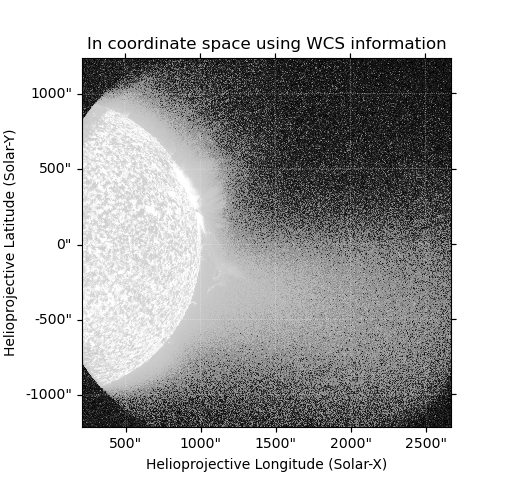
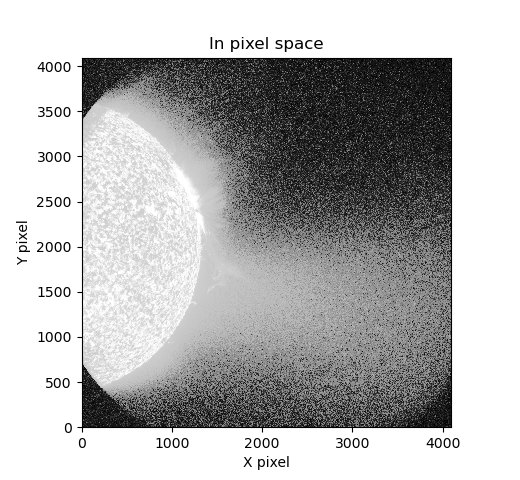
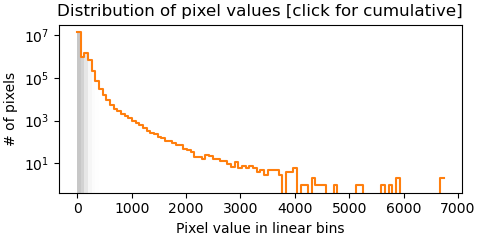
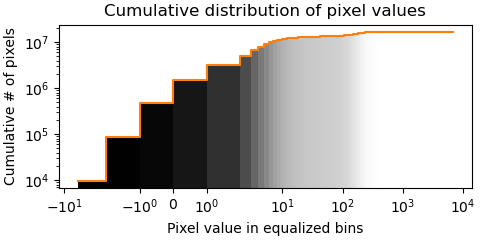

In [12]:
test=sunpy.map.Map(aia_files[0])
test

In [8]:
m_aia=sunpy.map.Map(aia_files)
# 309 files : 90s

In [25]:
len(m_aia)

309

In [38]:
type(m_aia)

list

In [5]:
a=m_aia[0]

NameError: name 'm_aia' is not defined

In [43]:
time=[]
for a in m_aia:
    time.append(a.date)

## General analysis of files

In [9]:
#Tx_list,Ty_list
Tx_list = []
Ty_list = []
for aia_map in m_aia:
    Tx_list.append(aia_map.center.Tx.value)
    Ty_list.append(aia_map.center.Ty.value)
    
#regular expression
strings = aia_files

time_pattern = r'\d{2}_\d{2}_\d{2}_\d{2}'
time=[]  # hh_mm_ss_ms     ms: 231 ms -> 23
for string in strings:
    match = re.search(time_pattern, string)
    if match:
        # print(match.group(0))
        time.append(match.group(0))
data = {
        "alpha_list": Tx_list,
        "beta_list": Ty_list,
        "time":time
        }
frame = pd.DataFrame(data)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'all iamges')

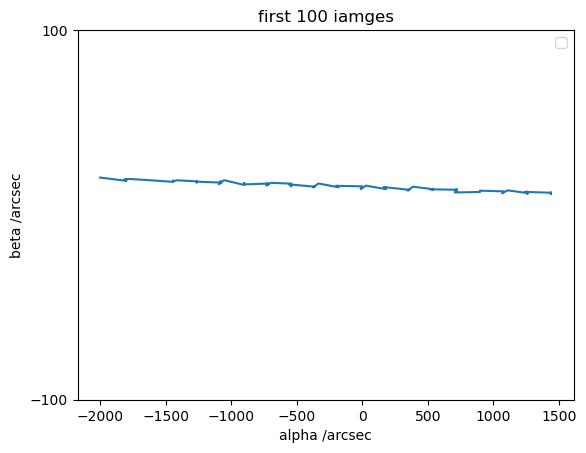

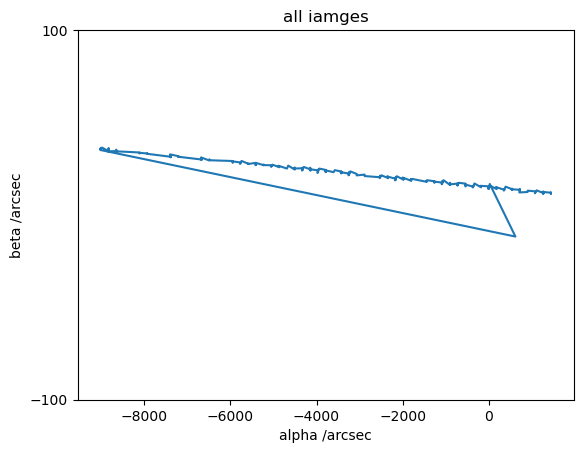

In [10]:
num = 100
# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.

# ax.scatter(Tx_list[:num], Ty_list[:num], label='fuck',  cmap=plt.cm.Blues,
#  edgecolors='none',)  # Plot some data on the axes.

ax.plot(Tx_list[:num], Ty_list[:num])

ax.set_xlabel('alpha /arcsec')
ax.set_yticks([-100, 100])
ax.set_ylabel('beta /arcsec')  # Add a y-label to the axes.
# ax.set_title("Simple Plot")  # Add a title to the axes.
ax.set_title('first {} iamges'.format(num))
ax.legend()  # Add a legend.

fig, ax = plt.subplots() 
ax.plot(Tx_list, Ty_list,)
ax.set_xlabel('alpha /arcsec')  # Add an x-label to the axes.
ax.set_yticks([-100, 100])
ax.set_ylabel('beta /arcsec')  # Add a y-label to the axes.
ax.set_title('all iamges')  # Add a title to the axes.

<AxesSubplot:>

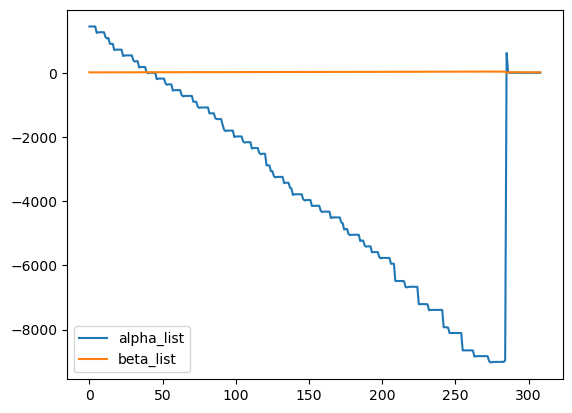

In [67]:
frame.plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


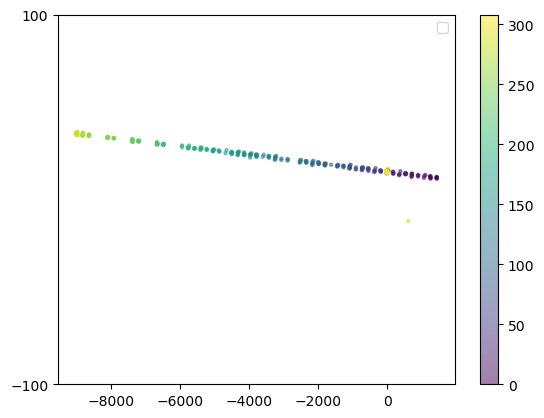

In [84]:
fig, ax = plt.subplots()
sc=ax.scatter(Tx_list,Ty_list,s=5,c=range(len(Tx_list)),alpha=0.5,)
ax.legend()
ax.set_yticks([-100, 100])
fig.colorbar(sc)

可以看到接近23:00 时有一个beta的最小值

In [52]:
min_index=np.argmin(Ty_list)
print("min_index"+str(min_index))
print()
print(frame.loc[min_index-1])
print()
print(frame.loc[min_index])
print()
print(frame.loc[min_index+1])

min_index285

alpha_list   -8958.610756
beta_list       34.852104
time          22_57_32_12
Name: 284, dtype: object

alpha_list     615.633045
beta_list       -11.70937
time          22_58_20_13
Name: 285, dtype: object

alpha_list      20.150881
beta_list        16.75436
time          22_58_32_12
Name: 286, dtype: object


## focused discussion
程志勋（2019）： alpha -1800'' to +1800'   
AIA data actually 1440'

alpha range:
-2002.2863317774609	1440.7275460038068
alpha range:
11.290190713059244	20.226221467598535


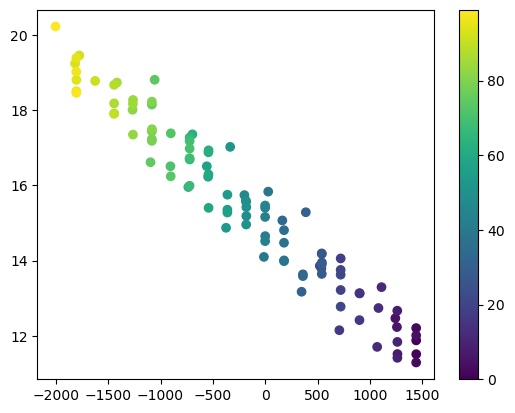

In [11]:
upper_limit=100
fig,ax=plt.subplots()
sc=ax.scatter(Tx_list[:upper_limit],Ty_list[:upper_limit],c=range(upper_limit))
fig.colorbar(sc)

print("alpha range:")
print(str(min(Tx_list[:upper_limit]))+'\t'+str(max((Tx_list[:upper_limit]))))
print("alpha range:")
print(str(min(Ty_list[:upper_limit]))+'\t'+str(max((Ty_list[:upper_limit]))))

alpha range:
-2536.155044709565	1440.7275460038068
alpha range:
11.290190713059244	21.41295420470541


C:\Users\asus-pc\AppData\Local\Temp\ipykernel_27744\1505241637.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.set_ticklabels(cb.get_ticks()[::-1])


array([  0.,  20.,  40.,  60.,  80., 100., 120.])

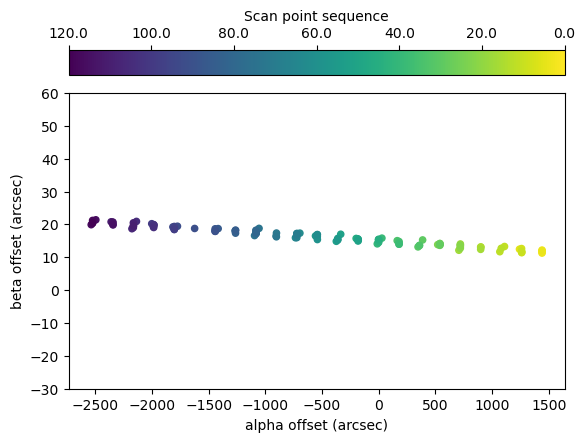

In [119]:
upper_limit=121
z=np.arange(upper_limit)
fig,ax=plt.subplots()
sc=ax.scatter(Tx_list[:upper_limit],Ty_list[:upper_limit],c=z[::-1],cmap='viridis',s=20)
ax.set_ylim(-30,60)
ax.set_xlabel("alpha offset (arcsec)")
ax.set_ylabel("beta offset (arcsec)")
cb=fig.colorbar(sc,shrink=1,label="Scan point sequence",location="top")

# tick=cb.get_ticks()
# cb.set_ticks(tick[::-1])
cb.set_ticklabels(cb.get_ticks()[::-1])


print("alpha range:")
print(str(min(Tx_list[:upper_limit]))+'\t'+str(max((Tx_list[:upper_limit]))))
print("alpha range:")
print(str(min(Ty_list[:upper_limit]))+'\t'+str(max((Ty_list[:upper_limit]))))

cb.get_ticks()

In [86]:
tick

array([  0.,  20.,  40.,  60.,  80., 100., 120.])

In [101]:
t=tick[::-1]
t

array([120., 100.,  80.,  60.,  40.,  20.,   0.])

In [99]:
test=np.array([120., 100.,  80.,  60.,  40.,  20.,   99990.])

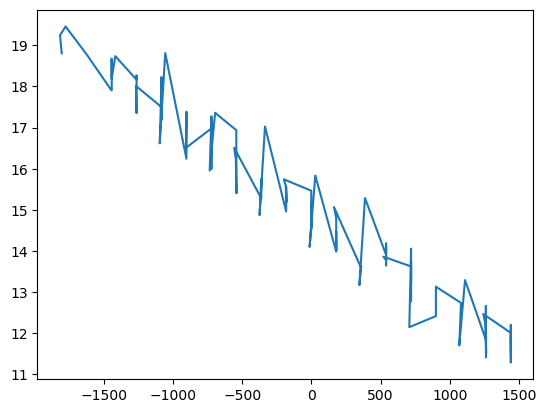

In [226]:
upper_limit=95
fig,ax=plt.subplots()
sc=ax.plot(Tx_list[:upper_limit],Ty_list[:upper_limit])

### Kick out some low equality points where SDO is rotating

In [130]:
upper_limit=95
alpha_list=np.array(Tx_list[:upper_limit])
beta_list=np.array(Ty_list[:upper_limit])
delta_alpha_list=np.zeros(len(alpha_list)-1,)   # length =94
for i in range(len(alpha_list)-1):
    delta_alpha_list[i]=alpha_list[i+1]-alpha_list[i]
    
    
    
# alpha_list:              1 2 4 6 9 15
# delta_alpha_list:        1 2 2 3 6

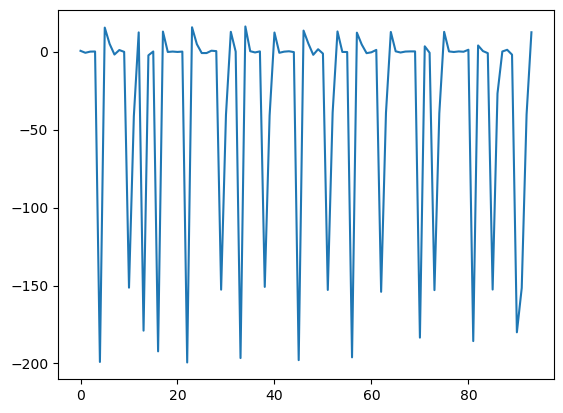

In [134]:
fig,ax=plt.subplots()
ax=plt.plot(delta_alpha_list)

In [163]:
moving_index=delta_alpha_list<-100   # below -100 means SDO is rotating between this and next point
moving_index

array([False, False, False, False,  True, False, False, False, False,
       False,  True, False, False,  True, False, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
        True,  True, False, False])

In [142]:
moving_index
forbidden_index=np.where(moving_index==True)

In [164]:
forbidden_index,=forbidden_index
forbidden_index  #SDO rotated between forbidden_index and forbidden_index+1

array([ 4, 10, 13, 16, 22, 29, 33, 38, 45, 51, 56, 62, 70, 73, 81, 85, 90,
       91], dtype=int64)

In [165]:
type(forbidden_index)

numpy.ndarray

In [199]:
len(forbidden_index)

18

In [167]:
forbidden_index+1

array([ 5, 11, 14, 17, 23, 30, 34, 39, 46, 52, 57, 63, 71, 74, 82, 86, 91,
       92], dtype=int64)

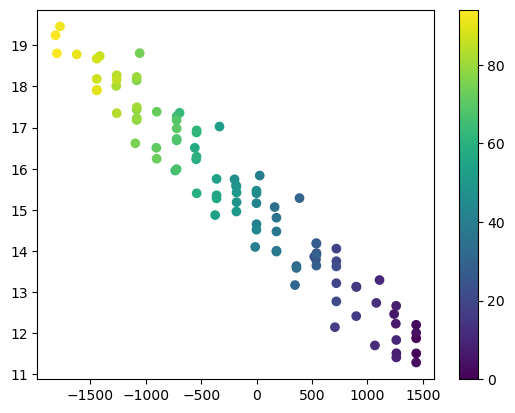

In [152]:
fig,ax=plt.subplots()
sc=ax.scatter(alpha_list,beta_list,c=range(len(alpha_list)))
fig.colorbar(sc)

In [194]:
forbidden_index

array([ 4, 10, 13, 16, 22, 29, 33, 38, 45, 51, 56, 62, 70, 73, 81, 85, 90,
       91], dtype=int64)

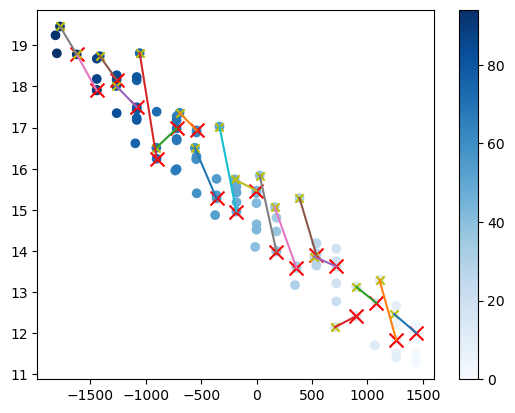

In [197]:
fig,ax=plt.subplots()
sc=ax.scatter(alpha_list,beta_list,c=range(len(alpha_list)),cmap=plt.cm.Blues)
fig.colorbar(sc)
ax.scatter(alpha_list[forbidden_index],beta_list[forbidden_index],marker='x',c='r',s=100)
ax.scatter(alpha_list[forbidden_index+1],beta_list[forbidden_index+1],marker='x',c='y')
for i in range(len(forbidden_index)):
    temp_alpha=[alpha_list[forbidden_index[i]],alpha_list[forbidden_index[i]+1 ]]
    temp_beta=[beta_list[forbidden_index[i]],beta_list[forbidden_index[i]+1 ]]
    
    ax.plot(temp_alpha,temp_beta)

leave those point with a mark on

In [239]:
alpha_pieces=np.split(alpha_list, forbidden_index+1)
beta_pieces=np.split(beta_list, forbidden_index+1)
print(len(alpha_pieces))
print(len(beta_pieces))
print(len(forbidden_index))


19
19
18


In [240]:
alpha_pieces[0]
beta_pieces[0]

array([11.87819489, 11.51149934, 12.20524913, 11.29019071, 12.01006373])

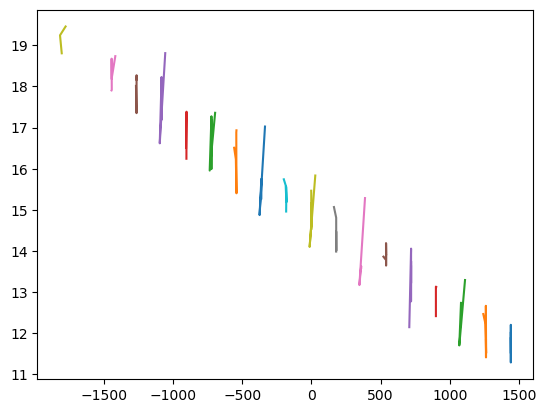

In [241]:
fig,ax=plt.subplots()
for piece_index in range(len(alpha_pieces)):
    ax.plot(alpha_pieces[piece_index],beta_pieces[piece_index])

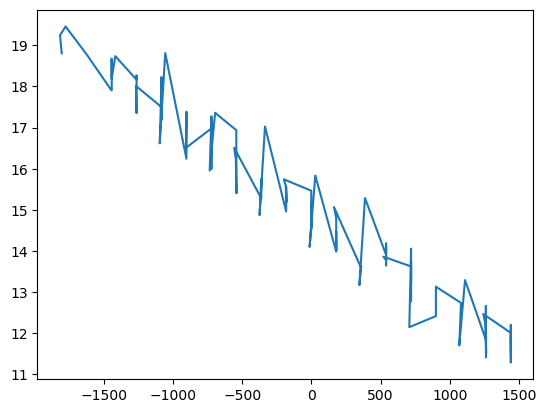

In [243]:
upper_limit=95
fig,ax=plt.subplots()
sc=ax.plot(Tx_list[:upper_limit],Ty_list[:upper_limit])

In [244]:
frame


,alpha_list,beta_list,time
0,1440.197947,11.878195,20_30_46_21
1,1440.727546,11.511499,20_31_06_21
2,1440.003981,12.205249,20_31_26_21
3,1440.029148,11.290191,20_32_06_21
4,1440.128064,12.010064,20_32_26_21
...,...,...,...
304,-1.692912,15.071206,23_03_56_12
305,-1.326521,15.033661,23_04_08_12
306,-1.309655,14.603423,23_04_20_12
307,-1.413992,14.651872,23_04_32_12


### draft

4

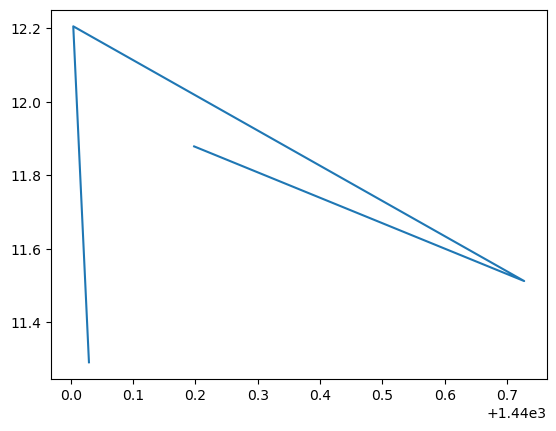

In [233]:
fig,ax=plt.subplots()
ax.plot(alpha_pieces[0],beta_pieces[0])
len(alpha_pieces[0])

In [187]:
range(len(forbidden_index))

range(0, 18)

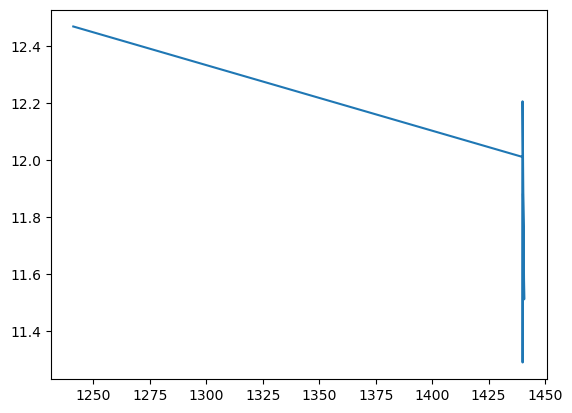

In [238]:
test=6
fig,ax=plt.subplots()
ax.plot(alpha_list[:test],beta_list[:test])
# this means len(alpha_piece)=5 instead of 4

In [188]:
i=0
temp_alpha=[alpha_list[forbidden_index[i]],alpha_list[forbidden_index[i+1] ]]
temp_beta=[beta_list[forbidden_index[i]],beta_list[forbidden_index[i+1] ]]

In [191]:
temp_alpha

[1440.128064048983, [1260.5746988829997]]

In [189]:
alpha_list[forbidden_index]

array([ 1.44012806e+03,  1.26057470e+03,  1.08019356e+03,  8.99000671e+02,
        7.19364590e+02,  5.39542114e+02,  3.59162706e+02,  1.78737136e+02,
       -1.61596085e+00, -1.82540619e+02, -3.61952747e+02, -5.41488016e+02,
       -7.22066874e+02, -9.02796611e+02, -1.08146385e+03, -1.26371860e+03,
       -1.44378312e+03, -1.62378504e+03])

In [190]:
ax.plot(temp_alpha,temp_beta)

ValueError: setting an array element with a sequence.

##  learn pandas numpy

In [33]:
data = {"state": ["Ohio", "Ohio", "Ohio", "Nevada", "Nevada", "Nevada"], 
        "year": [2000, 2001, 2002, 2001, 2002, 2003], 
        "pop": [1.5, 1.7, 3.6, 2.4, 2.9, 3.2,"clown"]}
frame=pd.DataFrame(data)
print(type(data))
frame

ValueError: All arrays must be of the same length

In [203]:
alpha = np.array(range(100))
idx = np.array([4, 10, 13, 16, 22, 29, 33, 38, 45, 51, 56, 62, 70, 73, 81, 85, 90, 91])
pieces = np.split(alpha, idx)


In [212]:
alpha_list

array([ 1.44019795e+03,  1.44072755e+03,  1.44000398e+03,  1.44002915e+03,
        1.44012806e+03,  1.24111221e+03,  1.25652797e+03,  1.26151383e+03,
        1.25967332e+03,  1.26070803e+03,  1.26057470e+03,  1.10920674e+03,
        1.06784616e+03,  1.08019356e+03,  9.01258956e+02,  8.98890301e+02,
        8.99000671e+02,  7.06776786e+02,  7.19654836e+02,  7.19450475e+02,
        7.19510489e+02,  7.19328940e+02,  7.19364590e+02,  5.20007278e+02,
        5.35632785e+02,  5.40406238e+02,  5.39501383e+02,  5.38603813e+02,
        5.39206664e+02,  5.39542114e+02,  3.86898141e+02,  3.46397987e+02,
        3.59119103e+02,  3.59162706e+02,  1.62643731e+02,  1.78791026e+02,
        1.79074989e+02,  1.78568983e+02,  1.78737136e+02,  2.78602975e+01,
       -1.31141358e+01, -8.51500902e-01, -1.57867346e+00, -1.57782917e+00,
       -1.33094701e+00, -1.61596085e+00, -1.99465789e+02, -1.85952485e+02,
       -1.80815229e+02, -1.82840617e+02, -1.81292942e+02, -1.82540619e+02,
       -3.35375687e+02, -

In [214]:
beta_list

array([11.87819489, 11.51149934, 12.20524913, 11.29019071, 12.01006373,
       12.46753274, 12.23279349, 11.51489133, 12.66744799, 11.4134802 ,
       11.83711366, 13.29394015, 11.70474602, 12.7382207 , 13.12674583,
       13.13372868, 12.41683288, 12.14837922, 14.0572929 , 13.21722464,
       13.75216754, 12.77521419, 13.6247189 , 13.86167223, 13.79312398,
       13.94859704, 14.1775418 , 14.19105481, 13.64503349, 13.90290261,
       15.28570415, 13.17147487, 13.63456091, 13.5874918 , 15.06803073,
       14.80866876, 14.0053458 , 14.4747196 , 13.98545765, 15.83422231,
       14.09792031, 14.65079749, 15.16127931, 14.51759103, 15.40401308,
       15.46459486, 15.742024  , 15.59585345, 15.18631632, 15.56326268,
       15.42161416, 14.95912886, 17.0242802 , 14.87248374, 15.75233064,
       15.3538104 , 15.27849832, 16.50854422, 16.23044364, 15.40218749,
       16.29245845, 16.87995352, 16.9326385 , 17.35831769, 15.95483994,
       17.27344122, 16.68917805, 15.98971927, 16.72351972, 17.17

In [210]:
pieces

[array([0, 1, 2, 3]),
 array([4, 5, 6, 7, 8, 9]),
 array([10, 11, 12]),
 array([13, 14, 15]),
 array([16, 17, 18, 19, 20, 21]),
 array([22, 23, 24, 25, 26, 27, 28]),
 array([29, 30, 31, 32]),
 array([33, 34, 35, 36, 37]),
 array([38, 39, 40, 41, 42, 43, 44]),
 array([45, 46, 47, 48, 49, 50]),
 array([51, 52, 53, 54, 55]),
 array([56, 57, 58, 59, 60, 61]),
 array([62, 63, 64, 65, 66, 67, 68, 69]),
 array([70, 71, 72]),
 array([73, 74, 75, 76, 77, 78, 79, 80]),
 array([81, 82, 83, 84]),
 array([85, 86, 87, 88, 89]),
 array([90]),
 array([91, 92, 93, 94, 95, 96, 97, 98, 99])]